In [1]:
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading combined annotation: annot


In [2]:
library("readxl")

In [3]:
wd=paste0(analysisDir,"/02_ct_signatures/")
dir.create(wd)

Warning message in dir.create(wd):
"'/scratch/projects/HTAPP_MBC//phase2/analysis//02_ct_signatures' already exists"

In [4]:
load(paste0(baseDir,"/PyCache/fresh_selected_raw.Rdata"))
fresh=so

In [5]:
load(paste0(baseDir,"/PyCache/frozen_TST_selected_raw.Rdata"))
frozen=so

In [6]:
rm(so)

In [8]:
ct_markers=read_excel(paste0(codeDir,"/meta/gene_sets/Wu et al subcluster DE genes.xlsx"),skip = 2)

In [8]:
head(ct_markers)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene,major lineage
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0,1.705000,0.725,0.320,0,Cancer Cycling,HIST1H4C,Cancer Epithelial
0,1.390945,0.588,0.040,0,Cancer Cycling,UBE2C,Cancer Epithelial
0,1.307819,0.888,0.436,0,Cancer Cycling,STMN1,Cancer Epithelial
0,1.196760,0.572,0.054,0,Cancer Cycling,CENPF,Cancer Epithelial
0,1.175181,0.907,0.670,0,Cancer Cycling,TUBA1B,Cancer Epithelial
0,1.153853,0.490,0.218,0,Cancer Cycling,FABP5,Cancer Epithelial


In [9]:
ct_markers_list=split(ct_markers$gene,f = ct_markers$cluster)

In [10]:
names(ct_markers_list)

[1] "B cells Memory"                  "B cells Naive"                  
 [3] "CAFs MSC iCAF-like s1"           "CAFs MSC iCAF-like s2"          
 [5] "CAFs Transitioning s3"           "CAFs myCAF like s4"             
 [7] "CAFs myCAF like s5"              "Cancer Basal SC"                
 [9] "Cancer Cycling"                  "Cancer Her2 SC"                 
[11] "Cancer LumA SC"                  "Cancer LumB SC"                 
[13] "Cycling PVL"                     "Cycling_Myeloid"                
[15] "Endothelial ACKR1"               "Endothelial CXCL12"             
[17] "Endothelial Lymphatic LYVE1"     "Endothelial RGS5"               
[19] "Luminal Progenitors"             "Mature Luminal"                 
[21] "Myeloid_c0_DC_LAMP3"             "Myeloid_c10_Macrophage_1_EGR1"  
[23] "Myeloid_c11_cDC2_CD1C"           "Myeloid_c12_Monocyte_1_IL1B"    
[25] "Myeloid_c1_LAM1_FABP5"           "Myeloid_c2_LAM2_APOE"           
[27] "Myeloid_c3_cDC1_CLEC9A"          "Myeloid_c4_DCs_pDC_IRF7"        
[29] "Myeloid_c5_Macrophage_3_SIGLEC1" "Myeloid_c7_Monocyte_3_FCGR3A"   
[31] "Myeloid_c8_Monocyte_2_S100A9"    "Myeloid_c9_Macrophage_2_CXCL10" 
[33] "Myoepithelial"                   "PVL Differentiated s3"          
[35] "PVL Immature s1"                 "PVL_Immature s2"                
[37] "T_cells_c0_CD4+_CCR7"            "T_cells_c10_NKT_cells_FCGR3A"   
[39] "T_cells_c11_MKI67"               "T_cells_c1_CD4+_IL7R"           
[41] "T_cells_c2_CD4+_T-regs_FOXP3"    "T_cells_c3_CD4+_Tfh_CXCL13"     
[43] "T_cells_c4_CD8+_ZFP36"           "T_cells_c5_CD8+_GZMK"           
[45] "T_cells_c6_IFIT1"                "T_cells_c7_CD8+_IFNG"           
[47] "T_cells_c8_CD8+_LAG3"            "T_cells_c9_NK_cells_AREG"

In [10]:
ct_fine_order=c('Luminal Progenitors','Mature Luminal','Myoepithelial','Cancer Cycling','Cancer LumA SC','Cancer LumB SC',
           'Cancer Her2 SC','Cancer Basal SC','Endothelial ACKR1','Endothelial RGS5','Endothelial CXCL12','Endothelial Lymphatic LYVE1',
           'CAFs MSC iCAF-like s1','CAFs MSC iCAF-like s2','CAFs Transitioning s3','CAFs myCAF like s4','CAFs myCAF like s5',
           'Cycling PVL','PVL Immature s1','PVL_Immature s2','PVL Differentiated s3','Cycling_Myeloid','Myeloid_c0_DC_LAMP3',
           'Myeloid_c1_LAM1_FABP5','Myeloid_c2_LAM2_APOE','Myeloid_c3_cDC1_CLEC9A','Myeloid_c4_DCs_pDC_IRF7',
           'Myeloid_c5_Macrophage_3_SIGLEC1','Myeloid_c7_Monocyte_3_FCGR3A','Myeloid_c8_Monocyte_2_S100A9',
           'Myeloid_c9_Macrophage_2_CXCL10','Myeloid_c10_Macrophage_1_EGR1','Myeloid_c11_cDC2_CD1C','Myeloid_c12_Monocyte_1_IL1B',
           'B cells Naive','B cells Memory','T_cells_c0_CD4+_CCR7','T_cells_c1_CD4+_IL7R','T_cells_c2_CD4+_T-regs_FOXP3',
           'T_cells_c3_CD4+_Tfh_CXCL13','T_cells_c4_CD8+_ZFP36','T_cells_c5_CD8+_GZMK','T_cells_c6_IFIT1','T_cells_c7_CD8+_IFNG',
           'T_cells_c8_CD8+_LAG3','T_cells_c9_NK_cells_AREG','T_cells_c10_NKT_cells_FCGR3A','T_cells_c11_MKI67')

In [13]:
fresh=NormalizeData(fresh)

In [14]:
frozen=NormalizeData(frozen)

In [15]:
add_scores=function(so,set){
        for (gset in names(set)){
            print(gset)
            so=AddModuleScore(so,set[gset],name = gset,search = TRUE,)
            names(so@meta.data)[grepl(gset,names(so@meta.data),fixed = T)] <- gset
            }
    return(so)
}

In [16]:
frozen=add_scores(frozen,ct_markers_list)

[1] "B cells Memory"


Warning message:
"The following features are not present in the object: AC090498.1, CTD-3252C9.4, AC079767.4, HIGD2A, HN1, SELM, RP5-1171I10.5, attempting to find updated synonyms"Found updated symbols for 3 symbols
AC079767.4 -> LINC01857
HN1 -> JPT1
SELM -> SELENOM
Warning message:
"The following features are still not present in the object: AC090498.1, CTD-3252C9.4, HIGD2A, RP5-1171I10.5"

[1] "B cells Naive"


Warning message:
"The following features are not present in the object: FAM26F, TMEM2, GLTSCR2, attempting to find updated synonyms"Found updated symbols for 3 symbols
FAM26F -> CALHM6
TMEM2 -> CEMIP2
GLTSCR2 -> NOP53


[1] "CAFs MSC iCAF-like s1"


Warning message:
"The following features are not present in the object: SEPP1, C10orf10, LHFP, FIGF, attempting to find updated synonyms"Found updated symbols for 4 symbols
SEPP1 -> SELENOP
C10orf10 -> DEPP1
LHFP -> LHFPL6
FIGF -> VEGFD


[1] "CAFs MSC iCAF-like s2"


Warning message:
"The following features are not present in the object: FIGF, attempting to find updated synonyms"Found updated symbols for 1 symbols
FIGF -> VEGFD


[1] "CAFs Transitioning s3"
[1] "CAFs myCAF like s4"
[1] "CAFs myCAF like s5"


Warning message:
"The following features are not present in the object: C1QTNF3, 40787, RP11-417E7.2, LINC00152, PTRF, ATP5E, MINOS1, FKBP11, PRKCDBP, C7orf73, attempting to find updated synonyms"Found updated symbols for 6 symbols
LINC00152 -> CYTOR
PTRF -> CAVIN1
ATP5E -> ATP5F1E
MINOS1 -> MICOS10
PRKCDBP -> CAVIN3
C7orf73 -> STMP1
Warning message:
"The following features are still not present in the object: C1QTNF3, 40787, RP11-417E7.2, MICOS10, FKBP11"

[1] "Cancer Basal SC"


Warning message:
"The following features are not present in the object: ATP5C1, ATP5B, PTRF, ATP5A1, NGFRAP1, FAM60A, TPT1-AS1, RP11-49I11.1, GLTSCR2, MIA, PRKCDBP, attempting to find updated synonyms"Found updated symbols for 8 symbols
ATP5C1 -> ATP5F1C
ATP5B -> ATP5F1B
PTRF -> CAVIN1
ATP5A1 -> ATP5F1A
NGFRAP1 -> BEX3
FAM60A -> SINHCAF
GLTSCR2 -> NOP53
PRKCDBP -> CAVIN3
Warning message:
"The following features are still not present in the object: TPT1-AS1, RP11-49I11.1, MIA"

[1] "Cancer Cycling"


Warning message:
"The following features are not present in the object: AIM1, KIAA0101, HN1, C19orf43, C20orf24, NGFRAP1, ATP5B, ATP5C1, SGOL1, ATPIF1, PTRF, ARPC1A, UFD1L, ATP5A1, SGOL2, LINC00152, 39326, C14orf1, attempting to find updated synonyms"Found updated symbols for 16 symbols
AIM1 -> CRYBG1
KIAA0101 -> PCLAF
HN1 -> JPT1
C19orf43 -> TRIR
C20orf24 -> RAB5IF
NGFRAP1 -> BEX3
ATP5B -> ATP5F1B
ATP5C1 -> ATP5F1C
SGOL1 -> SGO1
ATPIF1 -> ATP5IF1
PTRF -> CAVIN1
UFD1L -> UFD1
ATP5A1 -> ATP5F1A
SGOL2 -> SGO2
LINC00152 -> CYTOR
C14orf1 -> ERG28
Warning message:
"The following features are still not present in the object: ARPC1A, 39326"

[1] "Cancer Her2 SC"


Warning message:
"The following features are not present in the object: SEPP1, AIM1, C14orf1, NGRN, RP11-369C8.1, HN1, RP11-206M11.7, C19orf43, FAM127A, RP11-532F12.5, attempting to find updated synonyms"Found updated symbols for 7 symbols
SEPP1 -> SELENOP
AIM1 -> CRYBG1
C14orf1 -> ERG28
HN1 -> JPT1
C19orf43 -> TRIR
FAM127A -> RTL8C
RP11-532F12.5 -> SPINT1-AS1
Warning message:
"The following features are still not present in the object: NGRN, RP11-369C8.1, RP11-206M11.7"

[1] "Cancer LumA SC"


Warning message:
"The following features are not present in the object: AP000769.1, IFITM1, MS4A7, AC090498.1, SELM, ATP6V0C, CTD-3252C9.4, C1orf64, CTA-392E5.1, C4orf32, CTD-2336O2.1, C6orf1, RP11-138A9.2, ATHL1, LINC01420, GPX1, HNRNPU-AS1, LINC00993, attempting to find updated synonyms"Found updated symbols for 8 symbols
MS4A7 -> MS4A4A
SELM -> SELENOM
C1orf64 -> SRARP
C4orf32 -> FAM241A
C6orf1 -> SMIM29
ATHL1 -> PGGHG
LINC01420 -> NBDY
HNRNPU-AS1 -> HNRNPU
Warning message:
"The following features are still not present in the object: AP000769.1, IFITM1, AC090498.1, ATP6V0C, CTD-3252C9.4, CTA-392E5.1, CTD-2336O2.1, RP11-138A9.2, GPX1, LINC00993"

[1] "Cancer LumB SC"


Warning message:
"The following features are not present in the object: MLLT4, MYEOV2, AC018816.3, RP11-53O19.1, C1orf64, ATP5I, EGLN2, MMP24-AS1, RP1-313I6.12, ATP5O, FAM134B, FAM195B, EBLN3, C8orf4, LINC00993, SDHAF2, BLOC1S1, SYNJ2BP, PVRL2, FAM215B, MINOS1, 38777, attempting to find updated synonyms"Found updated symbols for 12 symbols
MLLT4 -> AFDN
MYEOV2 -> COPS9
C1orf64 -> SRARP
ATP5I -> ATP5ME
MMP24-AS1 -> MMP24OS
ATP5O -> ATP5PO
FAM134B -> RETREG1
FAM195B -> MCRIP1
EBLN3 -> EBLN3P
C8orf4 -> TCIM
PVRL2 -> NECTIN2
MINOS1 -> MICOS10
Warning message:
"The following features are still not present in the object: AC018816.3, RP11-53O19.1, EGLN2, RP1-313I6.12, ATP5PO, LINC00993, SDHAF2, BLOC1S1, SYNJ2BP, FAM215B, MICOS10, 38777"

[1] "Cycling PVL"


Warning message:
"The following features are not present in the object: KIAA0101, MINOS1, STRA13, 40787, LINC00152, TOMM5, FAM64A, SGOL2, UFD1L, CASC5, WHSC1, ATP5J2, MYEOV2, VIMP, 39692, ATP5G1, TMEM261, TCEB1, CRYZL1, PRKRIR, CCDC109B, attempting to find updated synonyms"Found updated symbols for 16 symbols
KIAA0101 -> PCLAF
MINOS1 -> MICOS10
LINC00152 -> CYTOR
FAM64A -> PIMREG
SGOL2 -> SGO2
UFD1L -> UFD1
CASC5 -> KNL1
WHSC1 -> NSD2
ATP5J2 -> ATP5MF
MYEOV2 -> COPS9
VIMP -> SELENOS
ATP5G1 -> ATP5MC1
TMEM261 -> DMAC1
TCEB1 -> ELOC
PRKRIR -> THAP12
CCDC109B -> MCUB
Warning message:
"The following features are still not present in the object: MICOS10, STRA13, 40787, TOMM5, ATP5MF, 39692, CRYZL1"

[1] "Cycling_Myeloid"


Warning message:
"The following features are not present in the object: STRA13, KIAA0101, ATP5J, HN1, TOMM5, ATP5J2, ATP5G3, SGOL1, ATP5G1, TCEB1, WHSC1, SGOL2, CASC5, ATP5I, C14orf2, SPTSSA, 39326, ATP5F1, MINOS1, ATP5O, ATP5B, ATP5H, KIAA1524, attempting to find updated synonyms"Found updated symbols for 19 symbols
KIAA0101 -> PCLAF
ATP5J -> ATP5PF
HN1 -> JPT1
ATP5J2 -> ATP5MF
ATP5G3 -> ATP5MC3
SGOL1 -> SGO1
ATP5G1 -> ATP5MC1
TCEB1 -> ELOC
WHSC1 -> NSD2
SGOL2 -> SGO2
CASC5 -> KNL1
ATP5I -> ATP5ME
C14orf2 -> ATP5MJ
ATP5F1 -> ATP5PB
MINOS1 -> MICOS10
ATP5O -> ATP5PO
ATP5B -> ATP5F1B
ATP5H -> ATP5PD
KIAA1524 -> CIP2A
Warning message:
"The following features are still not present in the object: STRA13, TOMM5, ATP5MF, ATP5MJ, SPTSSA, 39326, MICOS10, ATP5PO"

[1] "Endothelial ACKR1"


Warning message:
"The following features are not present in the object: RASA4, LINC-PINT, FKBP11, GLTSCR2, CALML4, C10orf128, TMEM2, attempting to find updated synonyms"Found updated symbols for 3 symbols
GLTSCR2 -> NOP53
C10orf128 -> TMEM273
TMEM2 -> CEMIP2
Warning message:
"The following features are still not present in the object: RASA4, LINC-PINT, FKBP11, CALML4"

[1] "Endothelial CXCL12"


Warning message:
"The following features are not present in the object: C10orf10, IGF2, GUCY1A3, PRKCDBP, EGFL8, attempting to find updated synonyms"Found updated symbols for 3 symbols
C10orf10 -> DEPP1
GUCY1A3 -> GUCY1A1
PRKCDBP -> CAVIN3
Warning message:
"The following features are still not present in the object: IGF2, EGFL8"

[1] "Endothelial Lymphatic LYVE1"


Warning message:
"The following features are not present in the object: C16orf62, RP11-322E11.5, LIMD2, LINC00152, MYZAP, attempting to find updated synonyms"Found updated symbols for 2 symbols
C16orf62 -> VPS35L
LINC00152 -> CYTOR
Warning message:
"The following features are still not present in the object: RP11-322E11.5, LIMD2, MYZAP"

[1] "Endothelial RGS5"


Warning message:
"The following features are not present in the object: LINC00152, IGF2, FAM101B, C8orf4, C10orf54, KIAA1462, PRKCDBP, 38231, NGFRAP1, SEPP1, attempting to find updated synonyms"Found updated symbols for 8 symbols
LINC00152 -> CYTOR
FAM101B -> RFLNB
C8orf4 -> TCIM
C10orf54 -> VSIR
KIAA1462 -> JCAD
PRKCDBP -> CAVIN3
NGFRAP1 -> BEX3
SEPP1 -> SELENOP
Warning message:
"The following features are still not present in the object: IGF2, 38231"

[1] "Luminal Progenitors"


Warning message:
"The following features are not present in the object: C2orf82, PROL1, TPT1-AS1, SPTSSA, GUCY1A3, RP11-817J15.2, C10orf10, AC090498.1, GLTSCR2, MRPS24, attempting to find updated synonyms"Found updated symbols for 5 symbols
C2orf82 -> SNORC
PROL1 -> OPRPN
GUCY1A3 -> GUCY1A1
C10orf10 -> DEPP1
GLTSCR2 -> NOP53
Warning message:
"The following features are still not present in the object: TPT1-AS1, SPTSSA, RP11-817J15.2, AC090498.1, MRPS24"

[1] "Mature Luminal"


Warning message:
"The following features are not present in the object: C8orf4, C1orf64, PVRL2, RP11-206M11.7, TMEM2, SERPINA3.1, PRDX2, MYEOV2, VIMP, SELK, SELM, STRA13, LINC00993, ATPIF1, APOA1BP, RP11-680F20.6, CTD-2015H6.3, MINOS1, HIGD1A, INADL, GBAS, ANG, ATP5J, WHSC1L1, RP11-12G12.7, C14orf1, C11orf31, SELT, ATP5I, HN1L, SPATA13, RP11-53O19.1, TCEB2, attempting to find updated synonyms"Found updated symbols for 21 symbols
C8orf4 -> TCIM
C1orf64 -> SRARP
PVRL2 -> NECTIN2
TMEM2 -> CEMIP2
MYEOV2 -> COPS9
VIMP -> SELENOS
SELK -> SELENOK
SELM -> SELENOM
ATPIF1 -> ATP5IF1
APOA1BP -> NAXE
MINOS1 -> MICOS10
INADL -> PATJ
GBAS -> NIPSNAP2
ATP5J -> ATP5PF
WHSC1L1 -> NSD3
C14orf1 -> ERG28
C11orf31 -> SELENOH
SELT -> SELENOT
ATP5I -> ATP5ME
HN1L -> JPT2
TCEB2 -> ELOB
Warning message:
"The following features are still not present in the object: RP11-206M11.7, SERPINA3.1, PRDX2, STRA13, LINC00993, RP11-680F20.6, CTD-2015H6.3, MICOS10, HIGD1A, ANG, RP11-12G12.7, SELENOH, SPATA13, RP11-53O19.1"

[1] "Myeloid_c0_DC_LAMP3"


Warning message:
"The following features are not present in the object: FAM60A, CTD-2020K17.1, RP11-138A9.1, RP11-138A9.2, CTA-384D8.35, AKAP2, AC079767.4, attempting to find updated synonyms"Found updated symbols for 2 symbols
FAM60A -> SINHCAF
AC079767.4 -> LINC01857
Warning message:
"The following features are still not present in the object: CTD-2020K17.1, RP11-138A9.1, RP11-138A9.2, CTA-384D8.35, AKAP2"

[1] "Myeloid_c10_Macrophage_1_EGR1"


Warning message:
"The following features are not present in the object: SEPP1, CCL3L3, MS4A7, CHMP1B, KIAA1683, RP11-160E2.6, SLC5A3, CTD-3252C9.4, PLEKHO2, CYBB, attempting to find updated synonyms"Found updated symbols for 3 symbols
SEPP1 -> SELENOP
MS4A7 -> MS4A4A
KIAA1683 -> IQCN
Warning message:
"The following features are still not present in the object: CCL3L3, CHMP1B, RP11-160E2.6, SLC5A3, CTD-3252C9.4, PLEKHO2, CYBB"

[1] "Myeloid_c11_cDC2_CD1C"


Warning message:
"The following features are not present in the object: 38961, LIMD2, AIM1, IFITM1, SDPR, AC090498.1, attempting to find updated synonyms"Found updated symbols for 2 symbols
AIM1 -> CRYBG1
SDPR -> CAVIN2
Warning message:
"The following features are still not present in the object: 38961, LIMD2, IFITM1, AC090498.1"

[1] "Myeloid_c12_Monocyte_1_IL1B"
[1] "Myeloid_c1_LAM1_FABP5"


Warning message:
"The following features are not present in the object: LINC01272, attempting to find updated synonyms"Found updated symbols for 1 symbols
LINC01272 -> PELATON
Warning message:
"The following features are still not present in the object: PELATON"

[1] "Myeloid_c2_LAM2_APOE"


Warning message:
"The following features are not present in the object: SEPP1, attempting to find updated synonyms"Found updated symbols for 1 symbols
SEPP1 -> SELENOP


[1] "Myeloid_c3_cDC1_CLEC9A"


Warning message:
"The following features are not present in the object: LIMD2, 38961, KIAA0226L, UNC119, C1orf186, ATP5A1, PRDX2, ATP5F1, PPY, ATP5B, RP5-1171I10.5, WBSCR22, CHN2, HN1, attempting to find updated synonyms"Found updated symbols for 7 symbols
KIAA0226L -> RUBCNL
C1orf186 -> RHEX
ATP5A1 -> ATP5F1A
ATP5F1 -> ATP5PB
ATP5B -> ATP5F1B
WBSCR22 -> BUD23
HN1 -> JPT1
Warning message:
"The following features are still not present in the object: LIMD2, 38961, UNC119, PRDX2, PPY, RP5-1171I10.5, CHN2"

[1] "Myeloid_c4_DCs_pDC_IRF7"


Warning message:
"The following features are not present in the object: C1orf186, C9orf142, VIMP, RP11-117D22.2, 38961, 37135, LINC-PINT, RP5-1171I10.5, HIGD1A, LIME1, GLTSCR2, 40057, RP11-73G16.2, RP1-313I6.12, RP11-596C23.2, KIAA0226L, NSMCE3, NME8, RP11-356I2.4, POLR2J3, IGKV1-12, 42248, C1orf228, RP11-138A9.1, AC011893.3, RP11-182L21.6, RP11-542M13.3, 40787, MED26, PTPRCAP, KIAA0125, ZCCHC11, AC006129.2, attempting to find updated synonyms"Found updated symbols for 8 symbols
C1orf186 -> RHEX
C9orf142 -> PAXX
VIMP -> SELENOS
GLTSCR2 -> NOP53
KIAA0226L -> RUBCNL
C1orf228 -> ARMH1
KIAA0125 -> FAM30A
ZCCHC11 -> TUT4
Warning message:
"The following features are still not present in the object: RP11-117D22.2, 38961, 37135, LINC-PINT, RP5-1171I10.5, HIGD1A, LIME1, 40057, RP11-73G16.2, RP1-313I6.12, RP11-596C23.2, NSMCE3, NME8, RP11-356I2.4, POLR2J3, IGKV1-12, 42248, RP11-138A9.1, AC011893.3, RP11-182L21.6, RP11-542M13.3, 40787, MED26, PTPRCAP, AC006129.2"

[1] "Myeloid_c5_Macrophage_3_SIGLEC1"


Warning message:
"The following features are not present in the object: RP11-160E2.6, SEPP1, MS4A7, PTPMT1, attempting to find updated synonyms"Found updated symbols for 2 symbols
SEPP1 -> SELENOP
MS4A7 -> MS4A4A
Warning message:
"The following features are still not present in the object: RP11-160E2.6, PTPMT1"

[1] "Myeloid_c7_Monocyte_3_FCGR3A"


Warning message:
"The following features are not present in the object: LINC01272, LIMD2, C10orf54, FAM65B, UNC119, MS4A7, 40057, RP11-362F19.1, GLTSCR2, CTD-2006K23.1, CTB-133G6.1, attempting to find updated synonyms"Found updated symbols for 5 symbols
LINC01272 -> PELATON
C10orf54 -> VSIR
FAM65B -> RIPOR2
MS4A7 -> MS4A4A
GLTSCR2 -> NOP53
Warning message:
"The following features are still not present in the object: PELATON, LIMD2, UNC119, 40057, RP11-362F19.1, CTD-2006K23.1, CTB-133G6.1"

[1] "Myeloid_c8_Monocyte_2_S100A9"


Warning message:
"The following features are not present in the object: LINC00936, RP11-1143G9.4, LINC01272, FAM65B, attempting to find updated synonyms"Found updated symbols for 3 symbols
LINC00936 -> ATP2B1-AS1
LINC01272 -> PELATON
FAM65B -> RIPOR2
Warning message:
"The following features are still not present in the object: RP11-1143G9.4, PELATON"

[1] "Myeloid_c9_Macrophage_2_CXCL10"


Warning message:
"The following features are not present in the object: FAM26F, IFITM1, FYB, PVRL2, CH17-373J23.1, attempting to find updated synonyms"Found updated symbols for 3 symbols
FAM26F -> CALHM6
FYB -> FYB1
PVRL2 -> NECTIN2
Warning message:
"The following features are still not present in the object: IFITM1, CH17-373J23.1"

[1] "Myoepithelial"


Warning message:
"The following features are not present in the object: PTRF, GRAMD3, IFITM1, CLDN11, WBP5, PRKCDBP, LHFP, AC013461.1, C10orf54, SDPR, NTF4, RP11-626H12.1, attempting to find updated synonyms"Found updated symbols for 7 symbols
PTRF -> CAVIN1
GRAMD3 -> GRAMD2B
WBP5 -> TCEAL9
PRKCDBP -> CAVIN3
LHFP -> LHFPL6
C10orf54 -> VSIR
SDPR -> CAVIN2
Warning message:
"The following features are still not present in the object: IFITM1, CLDN11, AC013461.1, NTF4, RP11-626H12.1"

[1] "PVL Differentiated s3"


Warning message:
"The following features are not present in the object: PRKCDBP, ARPC1A, AC013461.1, GPR4, attempting to find updated synonyms"Found updated symbols for 1 symbols
PRKCDBP -> CAVIN3
Warning message:
"The following features are still not present in the object: ARPC1A, AC013461.1, GPR4"

[1] "PVL Immature s1"


Warning message:
"The following features are not present in the object: IFITM1, FAM46A, C8orf4, LHFP, SDPR, attempting to find updated synonyms"Found updated symbols for 4 symbols
FAM46A -> TENT5A
C8orf4 -> TCIM
LHFP -> LHFPL6
SDPR -> CAVIN2
Warning message:
"The following features are still not present in the object: IFITM1"

[1] "PVL_Immature s2"


Warning message:
"The following features are not present in the object: LHFP, LINC00152, 40787, LIMD2, GUCY1B3, 38231, RP11-598F7.6, attempting to find updated synonyms"Found updated symbols for 3 symbols
LHFP -> LHFPL6
LINC00152 -> CYTOR
GUCY1B3 -> GUCY1B1
Warning message:
"The following features are still not present in the object: 40787, LIMD2, 38231, RP11-598F7.6"

[1] "T_cells_c0_CD4+_CCR7"


Warning message:
"The following features are not present in the object: GLTSCR2, CCDC109B, FLT3LG, FAM65B, attempting to find updated synonyms"Found updated symbols for 3 symbols
GLTSCR2 -> NOP53
CCDC109B -> MCUB
FAM65B -> RIPOR2
Warning message:
"The following features are still not present in the object: FLT3LG"

[1] "T_cells_c10_NKT_cells_FCGR3A"
[1] "T_cells_c11_MKI67"


Warning message:
"The following features are not present in the object: KIAA0101, ATP5G3, STRA13, CASC5, HN1, SGOL2, ATP5J, SGOL1, ATP5J2, ATP5G1, WHSC1, ATP5C1, ATP5B, ATP5D, SHFM1, PRDX2, C20orf24, C11orf31, ATP5F1, ATP5A1, ATPIF1, TOMM5, KIAA1524, HIST1H2AL, TCEB2, UFD1L, BLOC1S1, LINC00152, C14orf2, C14orf166, RP11-545E17.3, FAM64A, C19orf43, TCEB1, RP11-620J15.3, ATP5G2, C16orf13, ICT1, ATP5L, attempting to find updated synonyms"Found updated symbols for 33 symbols
KIAA0101 -> PCLAF
ATP5G3 -> ATP5MC3
CASC5 -> KNL1
HN1 -> JPT1
SGOL2 -> SGO2
ATP5J -> ATP5PF
SGOL1 -> SGO1
ATP5J2 -> ATP5MF
ATP5G1 -> ATP5MC1
WHSC1 -> NSD2
ATP5C1 -> ATP5F1C
ATP5B -> ATP5F1B
ATP5D -> ATP5F1D
SHFM1 -> SEM1
C20orf24 -> RAB5IF
C11orf31 -> SELENOH
ATP5F1 -> ATP5PB
ATP5A1 -> ATP5F1A
ATPIF1 -> ATP5IF1
KIAA1524 -> CIP2A
HIST1H2AL -> H2AC16
TCEB2 -> ELOB
UFD1L -> UFD1
LINC00152 -> CYTOR
C14orf2 -> ATP5MJ
C14orf166 -> RTRAF
FAM64A -> PIMREG
C19orf43 -> TRIR
TCEB1 -> ELOC
ATP5G2 -> ATP5MC2
C16orf13 -> METTL26
ICT1

[1] "T_cells_c1_CD4+_IL7R"
[1] "T_cells_c2_CD4+_T-regs_FOXP3"


Warning message:
"The following features are not present in the object: AC017002.1, AC145110.1, GPX1, WHSC1L1, LINC00152, 37681, 38961, IFNAR2, PRDX2, ATPIF1, attempting to find updated synonyms"Found updated symbols for 4 symbols
AC145110.1 -> LINC02099
WHSC1L1 -> NSD3
LINC00152 -> CYTOR
ATPIF1 -> ATP5IF1
Warning message:
"The following features are still not present in the object: AC017002.1, GPX1, 37681, 38961, IFNAR2, PRDX2"

[1] "T_cells_c3_CD4+_Tfh_CXCL13"


Warning message:
"The following features are not present in the object: IGFL2, LHFP, SH2D1A, PCAT29, C1orf228, RP5-1028K7.2, FYB, UNQ6494, RP11-25K19.1, ATP5G2, IFNAR2, 38961, SHFM1, attempting to find updated synonyms"Found updated symbols for 5 symbols
LHFP -> LHFPL6
C1orf228 -> ARMH1
FYB -> FYB1
ATP5G2 -> ATP5MC2
SHFM1 -> SEM1
Warning message:
"The following features are still not present in the object: IGFL2, SH2D1A, PCAT29, RP5-1028K7.2, UNQ6494, RP11-25K19.1, IFNAR2, 38961"

[1] "T_cells_c4_CD8+_ZFP36"


Warning message:
"The following features are not present in the object: RP11-291B21.2, CTD-3252C9.4, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: RP11-291B21.2, CTD-3252C9.4"

[1] "T_cells_c5_CD8+_GZMK"


Warning message:
"The following features are not present in the object: LIMD2, GLTSCR2, SH2D1A, IFITM1, CCDC109B, LINC-PINT, 38961, IGLV2-18, 40057, CTB-133G6.1, IGLV6-57, LIME1, FAM65B, RP5-1028K7.2, FYB, 37135, TMEM2, attempting to find updated synonyms"Found updated symbols for 5 symbols
GLTSCR2 -> NOP53
CCDC109B -> MCUB
FAM65B -> RIPOR2
FYB -> FYB1
TMEM2 -> CEMIP2
Warning message:
"The following features are still not present in the object: LIMD2, SH2D1A, IFITM1, LINC-PINT, 38961, IGLV2-18, 40057, CTB-133G6.1, IGLV6-57, LIME1, RP5-1028K7.2, 37135"

[1] "T_cells_c6_IFIT1"


Warning message:
"The following features are not present in the object: IFITM1, C5orf56, LIMD2, CCDC109B, attempting to find updated synonyms"Found updated symbols for 2 symbols
C5orf56 -> IRF1-AS1
CCDC109B -> MCUB
Warning message:
"The following features are still not present in the object: IFITM1, IRF1-AS1, LIMD2"

[1] "T_cells_c7_CD8+_IFNG"
[1] "T_cells_c8_CD8+_LAG3"


Warning message:
"The following features are not present in the object: RP11-291B21.2, CCL3L3, AC069363.1, AC092580.4, LINC00152, IFITM1, AC002331.1, 37135, RP11-25K19.1, SHFM1, LIMD2, C20orf24, ATP5G3, C19orf43, C6orf1, C17orf62, PTPRCAP, 39326, C11orf31, C9orf142, ATP5D, attempting to find updated synonyms"Found updated symbols for 10 symbols
LINC00152 -> CYTOR
SHFM1 -> SEM1
C20orf24 -> RAB5IF
ATP5G3 -> ATP5MC3
C19orf43 -> TRIR
C6orf1 -> SMIM29
C17orf62 -> CYBC1
C11orf31 -> SELENOH
C9orf142 -> PAXX
ATP5D -> ATP5F1D
Warning message:
"The following features are still not present in the object: RP11-291B21.2, CCL3L3, AC069363.1, AC092580.4, IFITM1, AC002331.1, 37135, RP11-25K19.1, LIMD2, PTPRCAP, 39326, SELENOH"

[1] "T_cells_c9_NK_cells_AREG"


Warning message:
"The following features are not present in the object: KLRC3, CTD-3252C9.4, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: KLRC3, CTD-3252C9.4"

In [17]:
fresh=add_scores(fresh,ct_markers_list)

[1] "B cells Memory"


Warning message:
"The following features are not present in the object: AC090498.1, CTD-3252C9.4, AC079767.4, HN1, SELM, RP5-1171I10.5, attempting to find updated synonyms"Found updated symbols for 3 symbols
AC079767.4 -> LINC01857
HN1 -> JPT1
SELM -> SELENOM
Warning message:
"The following features are still not present in the object: AC090498.1, CTD-3252C9.4, RP5-1171I10.5"

[1] "B cells Naive"


Warning message:
"The following features are not present in the object: FAM26F, TMEM2, GLTSCR2, attempting to find updated synonyms"Found updated symbols for 3 symbols
FAM26F -> CALHM6
TMEM2 -> CEMIP2
GLTSCR2 -> NOP53


[1] "CAFs MSC iCAF-like s1"


Warning message:
"The following features are not present in the object: SEPP1, C10orf10, LHFP, FIGF, attempting to find updated synonyms"Found updated symbols for 4 symbols
SEPP1 -> SELENOP
C10orf10 -> DEPP1
LHFP -> LHFPL6
FIGF -> VEGFD


[1] "CAFs MSC iCAF-like s2"


Warning message:
"The following features are not present in the object: FIGF, attempting to find updated synonyms"Found updated symbols for 1 symbols
FIGF -> VEGFD


[1] "CAFs Transitioning s3"
[1] "CAFs myCAF like s4"
[1] "CAFs myCAF like s5"


Warning message:
"The following features are not present in the object: 40787, RP11-417E7.2, LINC00152, PTRF, ATP5E, PRKCDBP, C7orf73, attempting to find updated synonyms"Found updated symbols for 5 symbols
LINC00152 -> CYTOR
PTRF -> CAVIN1
ATP5E -> ATP5F1E
PRKCDBP -> CAVIN3
C7orf73 -> STMP1
Warning message:
"The following features are still not present in the object: 40787, RP11-417E7.2"

[1] "Cancer Basal SC"


Warning message:
"The following features are not present in the object: ATP5C1, ATP5B, PTRF, ATP5A1, NGFRAP1, FAM60A, TPT1-AS1, RP11-49I11.1, GLTSCR2, PRKCDBP, attempting to find updated synonyms"Found updated symbols for 8 symbols
ATP5C1 -> ATP5F1C
ATP5B -> ATP5F1B
PTRF -> CAVIN1
ATP5A1 -> ATP5F1A
NGFRAP1 -> BEX3
FAM60A -> SINHCAF
GLTSCR2 -> NOP53
PRKCDBP -> CAVIN3
Warning message:
"The following features are still not present in the object: TPT1-AS1, RP11-49I11.1"

[1] "Cancer Cycling"


Warning message:
"The following features are not present in the object: AIM1, KIAA0101, HN1, C19orf43, C20orf24, NGFRAP1, ATP5B, ATP5C1, SGOL1, ATPIF1, PTRF, UFD1L, ATP5A1, SGOL2, LINC00152, 39326, C14orf1, attempting to find updated synonyms"Found updated symbols for 16 symbols
AIM1 -> CRYBG1
KIAA0101 -> PCLAF
HN1 -> JPT1
C19orf43 -> TRIR
C20orf24 -> RAB5IF
NGFRAP1 -> BEX3
ATP5B -> ATP5F1B
ATP5C1 -> ATP5F1C
SGOL1 -> SGO1
ATPIF1 -> ATP5IF1
PTRF -> CAVIN1
UFD1L -> UFD1
ATP5A1 -> ATP5F1A
SGOL2 -> SGO2
LINC00152 -> CYTOR
C14orf1 -> ERG28
Warning message:
"The following features are still not present in the object: 39326"

[1] "Cancer Her2 SC"


Warning message:
"The following features are not present in the object: SEPP1, AIM1, C14orf1, RP11-369C8.1, HN1, RP11-206M11.7, C19orf43, FAM127A, RP11-532F12.5, attempting to find updated synonyms"Found updated symbols for 7 symbols
SEPP1 -> SELENOP
AIM1 -> CRYBG1
C14orf1 -> ERG28
HN1 -> JPT1
C19orf43 -> TRIR
FAM127A -> RTL8C
RP11-532F12.5 -> SPINT1-AS1
Warning message:
"The following features are still not present in the object: RP11-369C8.1, RP11-206M11.7"

[1] "Cancer LumA SC"


Warning message:
"The following features are not present in the object: AP000769.1, AC090498.1, SELM, CTD-3252C9.4, C1orf64, CTA-392E5.1, C4orf32, CTD-2336O2.1, C6orf1, RP11-138A9.2, ATHL1, LINC01420, GPX1, HNRNPU-AS1, LINC00993, attempting to find updated synonyms"Found updated symbols for 7 symbols
SELM -> SELENOM
C1orf64 -> SRARP
C4orf32 -> FAM241A
C6orf1 -> SMIM29
ATHL1 -> PGGHG
LINC01420 -> NBDY
HNRNPU-AS1 -> HNRNPU
Warning message:
"The following features are still not present in the object: AP000769.1, AC090498.1, CTD-3252C9.4, CTA-392E5.1, CTD-2336O2.1, RP11-138A9.2, GPX1, LINC00993"

[1] "Cancer LumB SC"


Warning message:
"The following features are not present in the object: MLLT4, MYEOV2, AC018816.3, RP11-53O19.1, C1orf64, ATP5I, MMP24-AS1, RP1-313I6.12, ATP5O, FAM134B, FAM195B, EBLN3, C8orf4, LINC00993, PVRL2, 38777, attempting to find updated synonyms"Found updated symbols for 11 symbols
MLLT4 -> AFDN
MYEOV2 -> COPS9
C1orf64 -> SRARP
ATP5I -> ATP5ME
MMP24-AS1 -> MMP24OS
ATP5O -> ATP5PO
FAM134B -> RETREG1
FAM195B -> MCRIP1
EBLN3 -> EBLN3P
C8orf4 -> TCIM
PVRL2 -> NECTIN2
Warning message:
"The following features are still not present in the object: AC018816.3, RP11-53O19.1, RP1-313I6.12, LINC00993, 38777"

[1] "Cycling PVL"


Warning message:
"The following features are not present in the object: KIAA0101, STRA13, 40787, LINC00152, FAM64A, SGOL2, UFD1L, CASC5, WHSC1, ATP5J2, MYEOV2, VIMP, 39692, ATP5G1, TMEM261, TCEB1, PRKRIR, CCDC109B, attempting to find updated synonyms"Found updated symbols for 15 symbols
KIAA0101 -> PCLAF
LINC00152 -> CYTOR
FAM64A -> PIMREG
SGOL2 -> SGO2
UFD1L -> UFD1
CASC5 -> KNL1
WHSC1 -> NSD2
ATP5J2 -> ATP5MF
MYEOV2 -> COPS9
VIMP -> SELENOS
ATP5G1 -> ATP5MC1
TMEM261 -> DMAC1
TCEB1 -> ELOC
PRKRIR -> THAP12
CCDC109B -> MCUB
Warning message:
"The following features are still not present in the object: STRA13, 40787, 39692"

[1] "Cycling_Myeloid"


Warning message:
"The following features are not present in the object: STRA13, KIAA0101, ATP5J, HN1, ATP5J2, ATP5G3, SGOL1, ATP5G1, TCEB1, WHSC1, SGOL2, CASC5, ATP5I, C14orf2, 39326, ATP5F1, ATP5O, ATP5B, ATP5H, KIAA1524, attempting to find updated synonyms"Found updated symbols for 18 symbols
KIAA0101 -> PCLAF
ATP5J -> ATP5PF
HN1 -> JPT1
ATP5J2 -> ATP5MF
ATP5G3 -> ATP5MC3
SGOL1 -> SGO1
ATP5G1 -> ATP5MC1
TCEB1 -> ELOC
WHSC1 -> NSD2
SGOL2 -> SGO2
CASC5 -> KNL1
ATP5I -> ATP5ME
C14orf2 -> ATP5MJ
ATP5F1 -> ATP5PB
ATP5O -> ATP5PO
ATP5B -> ATP5F1B
ATP5H -> ATP5PD
KIAA1524 -> CIP2A
Warning message:
"The following features are still not present in the object: STRA13, ATP5MJ, 39326"

[1] "Endothelial ACKR1"


Warning message:
"The following features are not present in the object: LINC-PINT, GLTSCR2, C10orf128, TMEM2, attempting to find updated synonyms"Found updated symbols for 3 symbols
GLTSCR2 -> NOP53
C10orf128 -> TMEM273
TMEM2 -> CEMIP2
Warning message:
"The following features are still not present in the object: LINC-PINT"

[1] "Endothelial CXCL12"


Warning message:
"The following features are not present in the object: C10orf10, IGF2, GUCY1A3, PRKCDBP, attempting to find updated synonyms"Found updated symbols for 3 symbols
C10orf10 -> DEPP1
GUCY1A3 -> GUCY1A1
PRKCDBP -> CAVIN3
Warning message:
"The following features are still not present in the object: IGF2"

[1] "Endothelial Lymphatic LYVE1"


Warning message:
"The following features are not present in the object: C16orf62, RP11-322E11.5, LINC00152, attempting to find updated synonyms"Found updated symbols for 2 symbols
C16orf62 -> VPS35L
LINC00152 -> CYTOR
Warning message:
"The following features are still not present in the object: RP11-322E11.5"

[1] "Endothelial RGS5"


Warning message:
"The following features are not present in the object: LINC00152, IGF2, FAM101B, C8orf4, C10orf54, KIAA1462, PRKCDBP, 38231, NGFRAP1, SEPP1, attempting to find updated synonyms"Found updated symbols for 8 symbols
LINC00152 -> CYTOR
FAM101B -> RFLNB
C8orf4 -> TCIM
C10orf54 -> VSIR
KIAA1462 -> JCAD
PRKCDBP -> CAVIN3
NGFRAP1 -> BEX3
SEPP1 -> SELENOP
Warning message:
"The following features are still not present in the object: IGF2, 38231"

[1] "Luminal Progenitors"


Warning message:
"The following features are not present in the object: C2orf82, PROL1, TPT1-AS1, GUCY1A3, RP11-817J15.2, C10orf10, AC090498.1, GLTSCR2, attempting to find updated synonyms"Found updated symbols for 5 symbols
C2orf82 -> SNORC
PROL1 -> OPRPN
GUCY1A3 -> GUCY1A1
C10orf10 -> DEPP1
GLTSCR2 -> NOP53
Warning message:
"The following features are still not present in the object: TPT1-AS1, RP11-817J15.2, AC090498.1"

[1] "Mature Luminal"


Warning message:
"The following features are not present in the object: C8orf4, C1orf64, PVRL2, RP11-206M11.7, TMEM2, SERPINA3.1, MYEOV2, VIMP, SELK, SELM, STRA13, LINC00993, ATPIF1, APOA1BP, RP11-680F20.6, CTD-2015H6.3, INADL, GBAS, ATP5J, WHSC1L1, RP11-12G12.7, C14orf1, C11orf31, SELT, ATP5I, HN1L, RP11-53O19.1, TCEB2, attempting to find updated synonyms"Found updated symbols for 20 symbols
C8orf4 -> TCIM
C1orf64 -> SRARP
PVRL2 -> NECTIN2
TMEM2 -> CEMIP2
MYEOV2 -> COPS9
VIMP -> SELENOS
SELK -> SELENOK
SELM -> SELENOM
ATPIF1 -> ATP5IF1
APOA1BP -> NAXE
INADL -> PATJ
GBAS -> NIPSNAP2
ATP5J -> ATP5PF
WHSC1L1 -> NSD3
C14orf1 -> ERG28
C11orf31 -> SELENOH
SELT -> SELENOT
ATP5I -> ATP5ME
HN1L -> JPT2
TCEB2 -> ELOB
Warning message:
"The following features are still not present in the object: RP11-206M11.7, SERPINA3.1, STRA13, LINC00993, RP11-680F20.6, CTD-2015H6.3, RP11-12G12.7, RP11-53O19.1"

[1] "Myeloid_c0_DC_LAMP3"


Warning message:
"The following features are not present in the object: FAM60A, CTD-2020K17.1, RP11-138A9.1, RP11-138A9.2, CTA-384D8.35, AC079767.4, attempting to find updated synonyms"Found updated symbols for 2 symbols
FAM60A -> SINHCAF
AC079767.4 -> LINC01857
Warning message:
"The following features are still not present in the object: CTD-2020K17.1, RP11-138A9.1, RP11-138A9.2, CTA-384D8.35"

[1] "Myeloid_c10_Macrophage_1_EGR1"


Warning message:
"The following features are not present in the object: SEPP1, CCL3L3, KIAA1683, RP11-160E2.6, CTD-3252C9.4, attempting to find updated synonyms"Found updated symbols for 2 symbols
SEPP1 -> SELENOP
KIAA1683 -> IQCN
Warning message:
"The following features are still not present in the object: CCL3L3, RP11-160E2.6, CTD-3252C9.4"

[1] "Myeloid_c11_cDC2_CD1C"


Warning message:
"The following features are not present in the object: 38961, AIM1, SDPR, AC090498.1, attempting to find updated synonyms"Found updated symbols for 2 symbols
AIM1 -> CRYBG1
SDPR -> CAVIN2
Warning message:
"The following features are still not present in the object: 38961, AC090498.1"

[1] "Myeloid_c12_Monocyte_1_IL1B"
[1] "Myeloid_c1_LAM1_FABP5"


Warning message:
"The following features are not present in the object: LINC01272, attempting to find updated synonyms"Found updated symbols for 1 symbols
LINC01272 -> PELATON
Warning message:
"The following features are still not present in the object: PELATON"

[1] "Myeloid_c2_LAM2_APOE"


Warning message:
"The following features are not present in the object: SEPP1, attempting to find updated synonyms"Found updated symbols for 1 symbols
SEPP1 -> SELENOP


[1] "Myeloid_c3_cDC1_CLEC9A"


Warning message:
"The following features are not present in the object: 38961, KIAA0226L, C1orf186, ATP5A1, ATP5F1, ATP5B, RP5-1171I10.5, WBSCR22, HN1, attempting to find updated synonyms"Found updated symbols for 7 symbols
KIAA0226L -> RUBCNL
C1orf186 -> RHEX
ATP5A1 -> ATP5F1A
ATP5F1 -> ATP5PB
ATP5B -> ATP5F1B
WBSCR22 -> BUD23
HN1 -> JPT1
Warning message:
"The following features are still not present in the object: 38961, RP5-1171I10.5"

[1] "Myeloid_c4_DCs_pDC_IRF7"


Warning message:
"The following features are not present in the object: C1orf186, C9orf142, VIMP, RP11-117D22.2, 38961, 37135, LINC-PINT, RP5-1171I10.5, GLTSCR2, 40057, RP11-73G16.2, RP1-313I6.12, RP11-596C23.2, KIAA0226L, RP11-356I2.4, 42248, C1orf228, RP11-138A9.1, AC011893.3, RP11-182L21.6, RP11-542M13.3, 40787, KIAA0125, ZCCHC11, AC006129.2, attempting to find updated synonyms"Found updated symbols for 8 symbols
C1orf186 -> RHEX
C9orf142 -> PAXX
VIMP -> SELENOS
GLTSCR2 -> NOP53
KIAA0226L -> RUBCNL
C1orf228 -> ARMH1
KIAA0125 -> FAM30A
ZCCHC11 -> TUT4
Warning message:
"The following features are still not present in the object: RP11-117D22.2, 38961, 37135, LINC-PINT, RP5-1171I10.5, 40057, RP11-73G16.2, RP1-313I6.12, RP11-596C23.2, RP11-356I2.4, 42248, RP11-138A9.1, AC011893.3, RP11-182L21.6, RP11-542M13.3, 40787, AC006129.2"

[1] "Myeloid_c5_Macrophage_3_SIGLEC1"


Warning message:
"The following features are not present in the object: RP11-160E2.6, SEPP1, attempting to find updated synonyms"Found updated symbols for 1 symbols
SEPP1 -> SELENOP
Warning message:
"The following features are still not present in the object: RP11-160E2.6"

[1] "Myeloid_c7_Monocyte_3_FCGR3A"


Warning message:
"The following features are not present in the object: LINC01272, C10orf54, FAM65B, 40057, RP11-362F19.1, GLTSCR2, CTD-2006K23.1, CTB-133G6.1, attempting to find updated synonyms"Found updated symbols for 4 symbols
LINC01272 -> PELATON
C10orf54 -> VSIR
FAM65B -> RIPOR2
GLTSCR2 -> NOP53
Warning message:
"The following features are still not present in the object: PELATON, 40057, RP11-362F19.1, CTD-2006K23.1, CTB-133G6.1"

[1] "Myeloid_c8_Monocyte_2_S100A9"


Warning message:
"The following features are not present in the object: LINC00936, RP11-1143G9.4, LINC01272, FAM65B, attempting to find updated synonyms"Found updated symbols for 3 symbols
LINC00936 -> ATP2B1-AS1
LINC01272 -> PELATON
FAM65B -> RIPOR2
Warning message:
"The following features are still not present in the object: RP11-1143G9.4, PELATON"

[1] "Myeloid_c9_Macrophage_2_CXCL10"


Warning message:
"The following features are not present in the object: FAM26F, FYB, PVRL2, CH17-373J23.1, attempting to find updated synonyms"Found updated symbols for 3 symbols
FAM26F -> CALHM6
FYB -> FYB1
PVRL2 -> NECTIN2
Warning message:
"The following features are still not present in the object: CH17-373J23.1"

[1] "Myoepithelial"


Warning message:
"The following features are not present in the object: PTRF, GRAMD3, WBP5, PRKCDBP, LHFP, AC013461.1, C10orf54, SDPR, RP11-626H12.1, attempting to find updated synonyms"Found updated symbols for 7 symbols
PTRF -> CAVIN1
GRAMD3 -> GRAMD2B
WBP5 -> TCEAL9
PRKCDBP -> CAVIN3
LHFP -> LHFPL6
C10orf54 -> VSIR
SDPR -> CAVIN2
Warning message:
"The following features are still not present in the object: AC013461.1, RP11-626H12.1"

[1] "PVL Differentiated s3"


Warning message:
"The following features are not present in the object: PRKCDBP, AC013461.1, attempting to find updated synonyms"Found updated symbols for 1 symbols
PRKCDBP -> CAVIN3
Warning message:
"The following features are still not present in the object: AC013461.1"

[1] "PVL Immature s1"


Warning message:
"The following features are not present in the object: FAM46A, C8orf4, LHFP, SDPR, attempting to find updated synonyms"Found updated symbols for 4 symbols
FAM46A -> TENT5A
C8orf4 -> TCIM
LHFP -> LHFPL6
SDPR -> CAVIN2


[1] "PVL_Immature s2"


Warning message:
"The following features are not present in the object: LHFP, LINC00152, 40787, GUCY1B3, 38231, RP11-598F7.6, attempting to find updated synonyms"Found updated symbols for 3 symbols
LHFP -> LHFPL6
LINC00152 -> CYTOR
GUCY1B3 -> GUCY1B1
Warning message:
"The following features are still not present in the object: 40787, 38231, RP11-598F7.6"

[1] "T_cells_c0_CD4+_CCR7"


Warning message:
"The following features are not present in the object: GLTSCR2, CCDC109B, FAM65B, attempting to find updated synonyms"Found updated symbols for 3 symbols
GLTSCR2 -> NOP53
CCDC109B -> MCUB
FAM65B -> RIPOR2


[1] "T_cells_c10_NKT_cells_FCGR3A"
[1] "T_cells_c11_MKI67"


Warning message:
"The following features are not present in the object: KIAA0101, ATP5G3, STRA13, CASC5, HN1, SGOL2, ATP5J, SGOL1, ATP5J2, ATP5G1, WHSC1, ATP5C1, ATP5B, ATP5D, SHFM1, C20orf24, C11orf31, ATP5F1, ATP5A1, ATPIF1, KIAA1524, TCEB2, UFD1L, LINC00152, C14orf2, C14orf166, RP11-545E17.3, FAM64A, C19orf43, TCEB1, RP11-620J15.3, ATP5G2, C16orf13, ICT1, ATP5L, attempting to find updated synonyms"Found updated symbols for 32 symbols
KIAA0101 -> PCLAF
ATP5G3 -> ATP5MC3
CASC5 -> KNL1
HN1 -> JPT1
SGOL2 -> SGO2
ATP5J -> ATP5PF
SGOL1 -> SGO1
ATP5J2 -> ATP5MF
ATP5G1 -> ATP5MC1
WHSC1 -> NSD2
ATP5C1 -> ATP5F1C
ATP5B -> ATP5F1B
ATP5D -> ATP5F1D
SHFM1 -> SEM1
C20orf24 -> RAB5IF
C11orf31 -> SELENOH
ATP5F1 -> ATP5PB
ATP5A1 -> ATP5F1A
ATPIF1 -> ATP5IF1
KIAA1524 -> CIP2A
TCEB2 -> ELOB
UFD1L -> UFD1
LINC00152 -> CYTOR
C14orf2 -> ATP5MJ
C14orf166 -> RTRAF
FAM64A -> PIMREG
C19orf43 -> TRIR
TCEB1 -> ELOC
ATP5G2 -> ATP5MC2
C16orf13 -> METTL26
ICT1 -> MRPL58
ATP5L -> ATP5MG
Warning message:
"The follo

[1] "T_cells_c1_CD4+_IL7R"
[1] "T_cells_c2_CD4+_T-regs_FOXP3"


Warning message:
"The following features are not present in the object: AC145110.1, GPX1, WHSC1L1, LINC00152, 37681, 38961, ATPIF1, attempting to find updated synonyms"Found updated symbols for 4 symbols
AC145110.1 -> LINC02099
WHSC1L1 -> NSD3
LINC00152 -> CYTOR
ATPIF1 -> ATP5IF1
Warning message:
"The following features are still not present in the object: GPX1, 37681, 38961"

[1] "T_cells_c3_CD4+_Tfh_CXCL13"


Warning message:
"The following features are not present in the object: LHFP, PCAT29, C1orf228, RP5-1028K7.2, FYB, UNQ6494, RP11-25K19.1, ATP5G2, 38961, SHFM1, attempting to find updated synonyms"Found updated symbols for 5 symbols
LHFP -> LHFPL6
C1orf228 -> ARMH1
FYB -> FYB1
ATP5G2 -> ATP5MC2
SHFM1 -> SEM1
Warning message:
"The following features are still not present in the object: PCAT29, RP5-1028K7.2, UNQ6494, RP11-25K19.1, 38961"

[1] "T_cells_c4_CD8+_ZFP36"


Warning message:
"The following features are not present in the object: RP11-291B21.2, CTD-3252C9.4, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: RP11-291B21.2, CTD-3252C9.4"

[1] "T_cells_c5_CD8+_GZMK"


Warning message:
"The following features are not present in the object: GLTSCR2, CCDC109B, LINC-PINT, 38961, 40057, CTB-133G6.1, FAM65B, RP5-1028K7.2, FYB, 37135, TMEM2, attempting to find updated synonyms"Found updated symbols for 5 symbols
GLTSCR2 -> NOP53
CCDC109B -> MCUB
FAM65B -> RIPOR2
FYB -> FYB1
TMEM2 -> CEMIP2
Warning message:
"The following features are still not present in the object: LINC-PINT, 38961, 40057, CTB-133G6.1, RP5-1028K7.2, 37135"

[1] "T_cells_c6_IFIT1"


Warning message:
"The following features are not present in the object: C5orf56, CCDC109B, attempting to find updated synonyms"Found updated symbols for 2 symbols
C5orf56 -> IRF1-AS1
CCDC109B -> MCUB
Warning message:
"The following features are still not present in the object: IRF1-AS1"

[1] "T_cells_c7_CD8+_IFNG"
[1] "T_cells_c8_CD8+_LAG3"


Warning message:
"The following features are not present in the object: RP11-291B21.2, CCL3L3, AC069363.1, AC092580.4, LINC00152, AC002331.1, 37135, RP11-25K19.1, SHFM1, C20orf24, ATP5G3, C19orf43, C6orf1, C17orf62, 39326, C11orf31, C9orf142, ATP5D, attempting to find updated synonyms"Found updated symbols for 10 symbols
LINC00152 -> CYTOR
SHFM1 -> SEM1
C20orf24 -> RAB5IF
ATP5G3 -> ATP5MC3
C19orf43 -> TRIR
C6orf1 -> SMIM29
C17orf62 -> CYBC1
C11orf31 -> SELENOH
C9orf142 -> PAXX
ATP5D -> ATP5F1D
Warning message:
"The following features are still not present in the object: RP11-291B21.2, CCL3L3, AC069363.1, AC092580.4, AC002331.1, 37135, RP11-25K19.1, 39326"

[1] "T_cells_c9_NK_cells_AREG"


Warning message:
"The following features are not present in the object: CTD-3252C9.4, attempting to find updated synonyms"Warning message:
"No updated symbols found"Warning message:
"The following features are still not present in the object: CTD-3252C9.4"

In [69]:
#only needed because initially names with + were not corrected, should be fixed in the add_scores function now
#names(fresh@meta.data)[grepl("+",names(fresh@meta.data),fixed = T)] <- sub("1$","",names(fresh@meta.data)[grepl("+",names(fresh@meta.data),fixed = T)])

In [18]:
mt_frozen_dt=as.data.table(frozen@meta.data)
write.table(mt_frozen_dt,paste0(wd,"/frozen_meta.tsv"),sep="\t",quote=FALSE,row.names=FALSE)

In [6]:
mt_frozen_dt=fread(paste0(wd,"/frozen_meta.tsv"))

In [11]:
mt_frozen_long=melt(mt_frozen_dt,id.vars = c("orig.ident","cell_type","receptors_biopsy","site_biopsy"),measure.vars = names(ct_markers_list))
mt_frozen_long_red=mt_frozen_long[,.(mean=mean(value),fraction=sum(value>0.3)/.N),by=c("cell_type","variable")]

In [12]:
mt_frozen_long_red[,cell_type:=factor(cell_type,levels=names(ct_colors)),]
mt_frozen_long_red[,variable:=factor(variable,levels=ct_fine_order),]

png 
  2

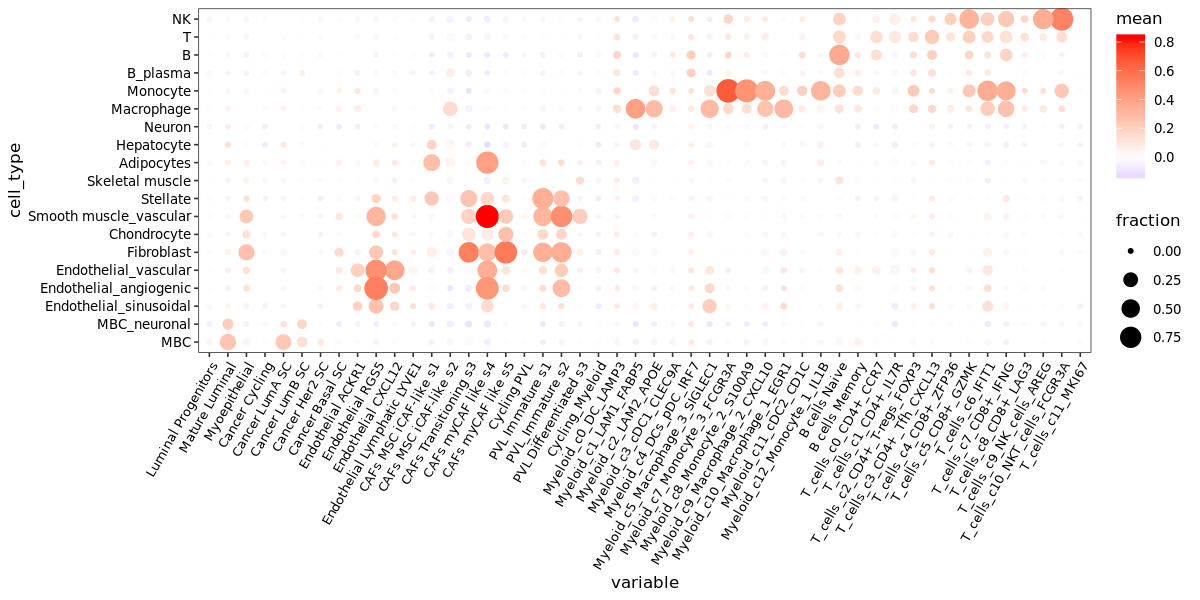

In [14]:
pl=ggplot(mt_frozen_long_red,aes(y=cell_type,x=variable,size=fraction,color=mean))+geom_point()+rotate_labels()+scale_color_gradient2(low = "blue",mid="white",high="red")
pdf(paste0(wd,"/frozen_ct_signatures.pdf"),height = 5,width = 10)
pl
dev.off()
options(repr.plot.width = 10, repr.plot.height =5)
pl

In [19]:
mt_fresh_dt=as.data.table(fresh@meta.data)
write.table(mt_fresh_dt,paste0(wd,"/fresh_meta.tsv"),sep="\t",quote=FALSE,row.names=FALSE)

In [15]:
mt_fresh_dt=fread(paste0(wd,"/fresh_meta.tsv"))

In [16]:
mt_fresh_long=melt(mt_fresh_dt,id.vars = c("orig.ident","cell_type","receptors_biopsy","site_biopsy"),measure.vars = names(ct_markers_list))
mt_fresh_long_red=mt_fresh_long[,.(mean=mean(value),fraction=sum(value>0.3)/.N),by=c("cell_type","variable")]

In [17]:
mt_fresh_long_red[,cell_type:=factor(cell_type,levels=names(ct_colors)),]
mt_fresh_long_red[,variable:=factor(variable,levels=ct_fine_order),]

png 
  2

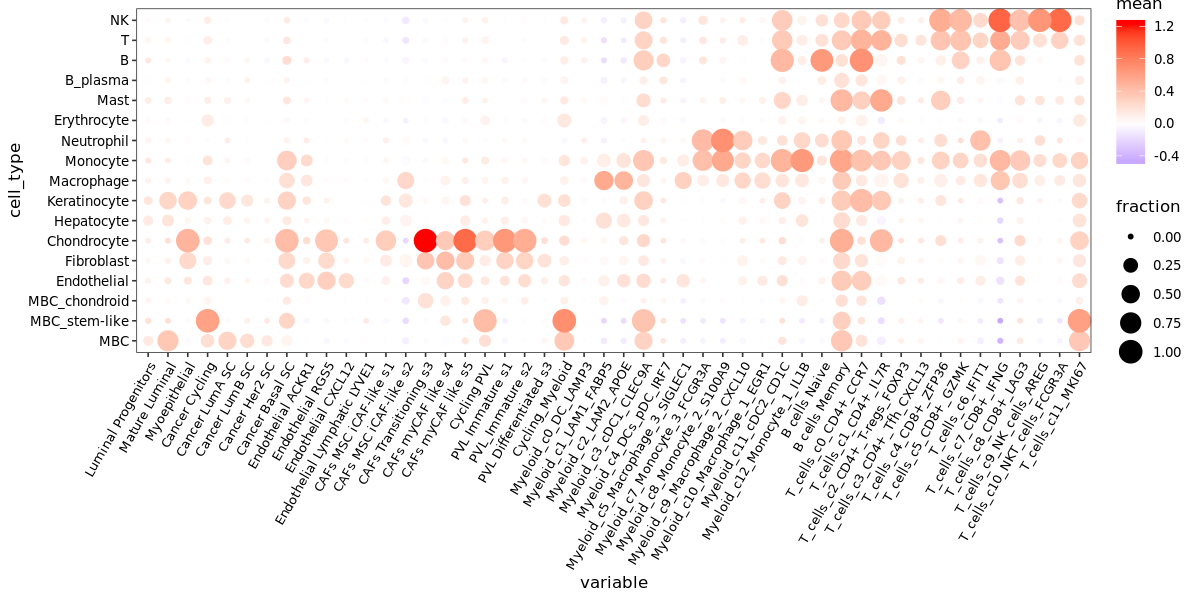

In [18]:
pl=ggplot(mt_fresh_long_red,aes(y=cell_type,x=variable,size=fraction,color=mean))+geom_point()+rotate_labels()+scale_color_gradient2(low = "blue",mid="white",high="red")
pdf(paste0(wd,"/fresh_ct_signatures.pdf"),height = 5,width = 10)
pl
dev.off()
options(repr.plot.width = 10, repr.plot.height =5)
pl